In [1]:
### pracitce LSTM and Merged model using keras

In [1]:
#Load the library
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Dropout, GRU
from keras.optimizers import SGD, RMSprop, Adam
from keras.wrappers.scikit_learn import KerasClassifier


import statsmodels.api as sm

from keras.layers.merge import concatenate
from keras.layers import Embedding, Input
from keras.models import Model
from keras.layers.core import Dense
batch_size = 125

#pd.set_option('display.max_rows', 1000000)
#pd.set_option('display.max_columns', 1000000)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
DATA = pd.read_csv('./data/default of credit card clients.csv')
DATA.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [3]:
DATA.columns = DATA.iloc[0]

In [4]:
DATA = DATA.drop([0])

In [5]:
data = DATA.copy()

In [6]:
data = data.astype('float')

In [7]:
data = data[data.columns[::-1]]
data.head()

,default payment next month,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2,PAY_AMT1,BILL_AMT6,BILL_AMT5,BILL_AMT4,...,PAY_4,PAY_3,PAY_2,PAY_0,AGE,MARRIAGE,EDUCATION,SEX,LIMIT_BAL,ID
1,1.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,2.0,2.0,24.0,1.0,2.0,2.0,20000.0,1.0
2,1.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0,3261.0,3455.0,3272.0,...,0.0,0.0,2.0,-1.0,26.0,2.0,2.0,2.0,120000.0,2.0
3,0.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0,15549.0,14948.0,14331.0,...,0.0,0.0,0.0,0.0,34.0,2.0,2.0,2.0,90000.0,3.0
4,0.0,1000.0,1069.0,1100.0,1200.0,2019.0,2000.0,29547.0,28959.0,28314.0,...,0.0,0.0,0.0,0.0,37.0,1.0,2.0,2.0,50000.0,4.0
5,0.0,679.0,689.0,9000.0,10000.0,36681.0,2000.0,19131.0,19146.0,20940.0,...,0.0,-1.0,0.0,-1.0,57.0,1.0,2.0,1.0,50000.0,5.0


In [8]:
data = data.drop(['ID'], axis = 1)

In [9]:
pd.set_option('display.max_rows', 1000000)
pd.set_option('display.max_columns', 1000000)

data.head()


,default payment next month,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2,PAY_AMT1,BILL_AMT6,BILL_AMT5,BILL_AMT4,BILL_AMT3,BILL_AMT2,BILL_AMT1,PAY_6,PAY_5,PAY_4,PAY_3,PAY_2,PAY_0,AGE,MARRIAGE,EDUCATION,SEX,LIMIT_BAL
1,1.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,689.0,3102.0,3913.0,-2.0,-2.0,-1.0,-1.0,2.0,2.0,24.0,1.0,2.0,2.0,20000.0
2,1.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0,3261.0,3455.0,3272.0,2682.0,1725.0,2682.0,2.0,0.0,0.0,0.0,2.0,-1.0,26.0,2.0,2.0,2.0,120000.0
3,0.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0,15549.0,14948.0,14331.0,13559.0,14027.0,29239.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,2.0,2.0,2.0,90000.0
4,0.0,1000.0,1069.0,1100.0,1200.0,2019.0,2000.0,29547.0,28959.0,28314.0,49291.0,48233.0,46990.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,1.0,2.0,2.0,50000.0
5,0.0,679.0,689.0,9000.0,10000.0,36681.0,2000.0,19131.0,19146.0,20940.0,35835.0,5670.0,8617.0,0.0,0.0,0.0,-1.0,0.0,-1.0,57.0,1.0,2.0,1.0,50000.0


In [10]:
y = data.iloc[:, 0]
y.head()

1    1.0
2    1.0
3    0.0
4    0.0
5    0.0
Name: default payment next month, dtype: float64

# 1

In [15]:
x_train, x_test, y_train, y_test = train_test_split(data.drop('default payment next month',axis=1), y, test_size = 0.2, random_state=1)

In [16]:
x_train.head()

,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2,PAY_AMT1,BILL_AMT6,BILL_AMT5,BILL_AMT4,BILL_AMT3,BILL_AMT2,BILL_AMT1,PAY_6,PAY_5,PAY_4,PAY_3,PAY_2,PAY_0,AGE,MARRIAGE,EDUCATION,SEX,LIMIT_BAL
28005,1000.0,6000.0,19000.0,1000.0,7027.0,0.0,20025.0,19786.0,7886.0,18979.0,17842.0,20128.0,0.0,0.0,0.0,0.0,2.0,1.0,30.0,2.0,2.0,2.0,20000.0
8561,316.0,316.0,316.0,316.0,350.0,282.0,316.0,316.0,316.0,316.0,282.0,316.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,32.0,1.0,2.0,2.0,50000.0
15485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,-2.0,-2.0,-2.0,-2.0,1.0,36.0,1.0,1.0,1.0,180000.0
12532,1035.0,0.0,0.0,3100.0,6050.0,2940.0,0.0,0.0,3100.0,6050.0,2940.0,5100.0,-2.0,-1.0,-1.0,-1.0,-1.0,0.0,50.0,2.0,2.0,2.0,20000.0
24474,1190.0,1190.0,2140.0,1489.0,390.0,2988.0,1190.0,2140.0,1489.0,390.0,2988.0,1190.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,49.0,2.0,1.0,1.0,340000.0


In [44]:
payAMT_data_x_train = x_train.iloc[:, 0:6]
payAMT_data_x_test = x_test.iloc[:, 0:6]

payAMT_data_x_train = payAMT_data_x_train.values.reshape([len(payAMT_data_x_train), len(payAMT_data_x_train.columns), 1])
payAMT_data_x_test = payAMT_data_x_test.values.reshape([len(payAMT_data_x_test), len(payAMT_data_x_test.columns), 1])

BILL_data_x_train = x_train.iloc[:, 6:12]
BILL_data_x_test = x_test.iloc[:, 6:12]

BILL_data_x_train = BILL_data_x_train.values.reshape([len(BILL_data_x_train), len(BILL_data_x_train.columns), 1])
BILL_data_x_test = BILL_data_x_test.values.reshape([len(BILL_data_x_test), len(BILL_data_x_test.columns), 1])

PAY_data_x_train = x_train.iloc[:, 12:18]
PAY_data_x_test = x_test.iloc[:, 12:18]

PAY_data_x_train = PAY_data_x_train.values.reshape([len(PAY_data_x_train), len(PAY_data_x_train.columns), 1])
PAY_data_x_test = PAY_data_x_test.values.reshape([len(PAY_data_x_test), len(PAY_data_x_test.columns), 1])

demo_data_x_train = x_train.iloc[:, 18:]
demo_data_x_test = x_test.iloc[:, 18:]

demo_data_x_train = demo_data_x_train.values.reshape([len(demo_data_x_train), len(demo_data_x_train.columns), 1])
demo_data_x_test = demo_data_x_test.values.reshape([len(demo_data_x_test), len(demo_data_x_test.columns), 1])

In [ ]:
#model.fit(Xtrain, Ytrain, batch_size=BATCH_SIZE, epochs=10, validation_data=(Xtest, Ytest))
#model.fit([PAY_data, BILL_data], y,nb_epoch=20, batch_size=50, verbose=2, validation_split=0.2)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_78 (InputLayer)           (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_79 (InputLayer)           (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_80 (InputLayer)           (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_81 (InputLayer)           (None, 5, 1)         0                                            
__________________________________________________________________________________________________
gru_79 (GR

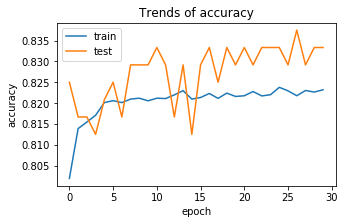



ACC:  0.8198333333333333
AUC:  0.7558830950250313
Log Loss:  0.4407052631167074


Confusion Matrix: 
[[4423  240]
 [ 841  496]]


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      4663
         1.0       0.67      0.37      0.48      1337

   micro avg       0.82      0.82      0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [54]:
input1 = Input(shape=(6,1))
#pay = GRU(20, return_sequences=True)(input1)
pay = GRU(20)(input1)
pay = Dense(20, activation='tanh')(pay)
pay = Dropout(0.2)(pay)
    
input2 = Input(shape=(6,1))
#bill = GRU(20, return_sequences=True)(input2)
bill = GRU(20)(input2)
bill = Dense(20, activation='tanh')(bill)
bill = Dropout(0.2)(bill)

input3 = Input(shape=(6,1))
#pay_amt = GRU(20, return_sequences=True)(input3)
pay_amt = GRU(20)(input3)
pay_amt = Dense(20, activation='tanh')(pay_amt)
pay_amt = Dropout(0.2)(pay_amt)

input4 = Input(shape=(5,1))
demo = GRU(20)(input4)
demo = Dense(20, activation= 'tanh')(demo)
demo = Dropout(0.2)(demo)


merge = concatenate([pay, bill, pay_amt, demo])
    
hidden1 = Dense(20, activation='tanh')(merge)
    
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=[input1, input2, input3, input4], outputs=output)
    
model.summary()
    
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


BATCH_SIZE = 64

history = model.fit([PAY_data_x_train, BILL_data_x_train, payAMT_data_x_train, demo_data_x_train],
                    y_train, batch_size = BATCH_SIZE, epochs=30, verbose=0, validation_split = 0.01)

# summarize history for accuracy in val
plt.figure(figsize=(5, 3))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Trends of accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
pred_proba = model.predict([PAY_data_x_test, BILL_data_x_test, payAMT_data_x_test, demo_data_x_test])
pred = (pred_proba > 0.5).astype(int)
print('\n')
print('ACC: ',accuracy_score(y_test, pred))
print('AUC: ',roc_auc_score(y_test, pred_proba))
print('Log Loss: ', log_loss(pd.get_dummies(y_test), pred_proba))
print('\n')
print('Confusion Matrix: ')
print(confusion_matrix(y_test, pred))
print('\n')
print('Classification Report: ')
print(classification_report(y_test, pred))
acc = []
acc.append(accuracy_score(y_test, pred))

# 2

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_82 (InputLayer)           (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_83 (InputLayer)           (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_84 (InputLayer)           (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_85 (InputLayer)           (None, 5, 1)         0                                            
__________________________________________________________________________________________________
gru_83 (GR

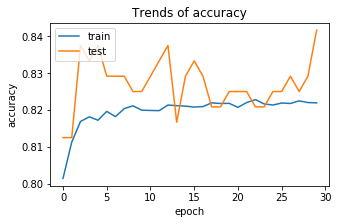



ACC:  0.822
AUC:  0.7702596834342923
Log Loss:  0.4335032895480593


Confusion Matrix: 
[[4384  281]
 [ 787  548]]


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89      4665
         1.0       0.66      0.41      0.51      1335

   micro avg       0.82      0.82      0.82      6000
   macro avg       0.75      0.68      0.70      6000
weighted avg       0.81      0.82      0.81      6000



In [55]:
### train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop('default payment next month',axis=1), y, test_size = 0.2, random_state=2)

### split small data
payAMT_data_x_train = x_train.iloc[:, 0:6]
payAMT_data_x_test = x_test.iloc[:, 0:6]

payAMT_data_x_train = payAMT_data_x_train.values.reshape([len(payAMT_data_x_train), len(payAMT_data_x_train.columns), 1])
payAMT_data_x_test = payAMT_data_x_test.values.reshape([len(payAMT_data_x_test), len(payAMT_data_x_test.columns), 1])

BILL_data_x_train = x_train.iloc[:, 6:12]
BILL_data_x_test = x_test.iloc[:, 6:12]

BILL_data_x_train = BILL_data_x_train.values.reshape([len(BILL_data_x_train), len(BILL_data_x_train.columns), 1])
BILL_data_x_test = BILL_data_x_test.values.reshape([len(BILL_data_x_test), len(BILL_data_x_test.columns), 1])

PAY_data_x_train = x_train.iloc[:, 12:18]
PAY_data_x_test = x_test.iloc[:, 12:18]

PAY_data_x_train = PAY_data_x_train.values.reshape([len(PAY_data_x_train), len(PAY_data_x_train.columns), 1])
PAY_data_x_test = PAY_data_x_test.values.reshape([len(PAY_data_x_test), len(PAY_data_x_test.columns), 1])

demo_data_x_train = x_train.iloc[:, 18:]
demo_data_x_test = x_test.iloc[:, 18:]

demo_data_x_train = demo_data_x_train.values.reshape([len(demo_data_x_train), len(demo_data_x_train.columns), 1])
demo_data_x_test = demo_data_x_test.values.reshape([len(demo_data_x_test), len(demo_data_x_test.columns), 1])

### model run
input1 = Input(shape=(6,1))
#pay = GRU(20, return_sequences=True)(input1)
pay = GRU(20)(input1)
pay = Dense(20, activation='tanh')(pay)
pay = Dropout(0.2)(pay)
    
input2 = Input(shape=(6,1))
#bill = GRU(20, return_sequences=True)(input2)
bill = GRU(20)(input2)
bill = Dense(20, activation='tanh')(bill)
bill = Dropout(0.2)(bill)

input3 = Input(shape=(6,1))
#pay_amt = GRU(20, return_sequences=True)(input3)
pay_amt = GRU(20)(input3)
pay_amt = Dense(20, activation='tanh')(pay_amt)
pay_amt = Dropout(0.2)(pay_amt)

input4 = Input(shape=(5,1))
demo = GRU(20)(input4)
demo = Dense(20, activation= 'tanh')(demo)
demo = Dropout(0.2)(demo)


merge = concatenate([pay, bill, pay_amt, demo])
    
hidden1 = Dense(20, activation='tanh')(merge)
    
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=[input1, input2, input3, input4], outputs=output)
    
model.summary()
    
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


BATCH_SIZE = 64

history = model.fit([PAY_data_x_train, BILL_data_x_train, payAMT_data_x_train, demo_data_x_train],
                    y_train, batch_size = BATCH_SIZE, epochs=30, verbose=0, validation_split = 0.01)

# summarize history for accuracy in val
plt.figure(figsize=(5, 3))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Trends of accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
pred_proba = model.predict([PAY_data_x_test, BILL_data_x_test, payAMT_data_x_test, demo_data_x_test])
pred = (pred_proba > 0.5).astype(int)
print('\n')
print('ACC: ',accuracy_score(y_test, pred))
print('AUC: ',roc_auc_score(y_test, pred_proba))
print('Log Loss: ', log_loss(pd.get_dummies(y_test), pred_proba))
print('\n')
print('Confusion Matrix: ')
print(confusion_matrix(y_test, pred))
print('\n')
print('Classification Report: ')
print(classification_report(y_test, pred))
acc.append(accuracy_score(y_test, pred))

# 3

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_86 (InputLayer)           (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_87 (InputLayer)           (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_88 (InputLayer)           (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_89 (InputLayer)           (None, 5, 1)         0                                            
__________________________________________________________________________________________________
gru_87 (GR

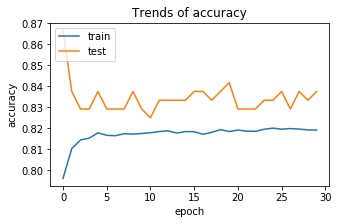



ACC:  0.832
AUC:  0.7830512460602211
Log Loss:  0.41274884413182733


Confusion Matrix: 
[[4523  225]
 [ 783  469]]


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90      4748
         1.0       0.68      0.37      0.48      1252

   micro avg       0.83      0.83      0.83      6000
   macro avg       0.76      0.66      0.69      6000
weighted avg       0.82      0.83      0.81      6000



In [56]:
### train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop('default payment next month',axis=1), y, test_size = 0.2, random_state=3)

### split small data
payAMT_data_x_train = x_train.iloc[:, 0:6]
payAMT_data_x_test = x_test.iloc[:, 0:6]

payAMT_data_x_train = payAMT_data_x_train.values.reshape([len(payAMT_data_x_train), len(payAMT_data_x_train.columns), 1])
payAMT_data_x_test = payAMT_data_x_test.values.reshape([len(payAMT_data_x_test), len(payAMT_data_x_test.columns), 1])

BILL_data_x_train = x_train.iloc[:, 6:12]
BILL_data_x_test = x_test.iloc[:, 6:12]

BILL_data_x_train = BILL_data_x_train.values.reshape([len(BILL_data_x_train), len(BILL_data_x_train.columns), 1])
BILL_data_x_test = BILL_data_x_test.values.reshape([len(BILL_data_x_test), len(BILL_data_x_test.columns), 1])

PAY_data_x_train = x_train.iloc[:, 12:18]
PAY_data_x_test = x_test.iloc[:, 12:18]

PAY_data_x_train = PAY_data_x_train.values.reshape([len(PAY_data_x_train), len(PAY_data_x_train.columns), 1])
PAY_data_x_test = PAY_data_x_test.values.reshape([len(PAY_data_x_test), len(PAY_data_x_test.columns), 1])

demo_data_x_train = x_train.iloc[:, 18:]
demo_data_x_test = x_test.iloc[:, 18:]

demo_data_x_train = demo_data_x_train.values.reshape([len(demo_data_x_train), len(demo_data_x_train.columns), 1])
demo_data_x_test = demo_data_x_test.values.reshape([len(demo_data_x_test), len(demo_data_x_test.columns), 1])

### model run
input1 = Input(shape=(6,1))
#pay = GRU(20, return_sequences=True)(input1)
pay = GRU(20)(input1)
pay = Dense(20, activation='tanh')(pay)
pay = Dropout(0.2)(pay)
    
input2 = Input(shape=(6,1))
#bill = GRU(20, return_sequences=True)(input2)
bill = GRU(20)(input2)
bill = Dense(20, activation='tanh')(bill)
bill = Dropout(0.2)(bill)

input3 = Input(shape=(6,1))
#pay_amt = GRU(20, return_sequences=True)(input3)
pay_amt = GRU(20)(input3)
pay_amt = Dense(20, activation='tanh')(pay_amt)
pay_amt = Dropout(0.2)(pay_amt)

input4 = Input(shape=(5,1))
demo = GRU(20)(input4)
demo = Dense(20, activation= 'tanh')(demo)
demo = Dropout(0.2)(demo)


merge = concatenate([pay, bill, pay_amt, demo])
    
hidden1 = Dense(20, activation='tanh')(merge)
    
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=[input1, input2, input3, input4], outputs=output)
    
model.summary()
    
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


BATCH_SIZE = 64

history = model.fit([PAY_data_x_train, BILL_data_x_train, payAMT_data_x_train, demo_data_x_train],
                    y_train, batch_size = BATCH_SIZE, epochs=30, verbose=0, validation_split = 0.01)

# summarize history for accuracy in val
plt.figure(figsize=(5, 3))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Trends of accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
pred_proba = model.predict([PAY_data_x_test, BILL_data_x_test, payAMT_data_x_test, demo_data_x_test])
pred = (pred_proba > 0.5).astype(int)
print('\n')
print('ACC: ',accuracy_score(y_test, pred))
print('AUC: ',roc_auc_score(y_test, pred_proba))
print('Log Loss: ', log_loss(pd.get_dummies(y_test), pred_proba))
print('\n')
print('Confusion Matrix: ')
print(confusion_matrix(y_test, pred))
print('\n')
print('Classification Report: ')
print(classification_report(y_test, pred))
acc.append(accuracy_score(y_test, pred))

# 4

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_90 (InputLayer)           (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_91 (InputLayer)           (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_92 (InputLayer)           (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_93 (InputLayer)           (None, 5, 1)         0                                            
__________________________________________________________________________________________________
gru_91 (GR

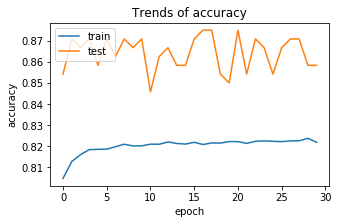



ACC:  0.8171666666666667
AUC:  0.75997505760686
Log Loss:  0.4414029177917788


Confusion Matrix: 
[[4437  201]
 [ 896  466]]


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      4638
         1.0       0.70      0.34      0.46      1362

   micro avg       0.82      0.82      0.82      6000
   macro avg       0.77      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000



In [57]:
### train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop('default payment next month',axis=1), y, test_size = 0.2, random_state=4)

### split small data
payAMT_data_x_train = x_train.iloc[:, 0:6]
payAMT_data_x_test = x_test.iloc[:, 0:6]

payAMT_data_x_train = payAMT_data_x_train.values.reshape([len(payAMT_data_x_train), len(payAMT_data_x_train.columns), 1])
payAMT_data_x_test = payAMT_data_x_test.values.reshape([len(payAMT_data_x_test), len(payAMT_data_x_test.columns), 1])

BILL_data_x_train = x_train.iloc[:, 6:12]
BILL_data_x_test = x_test.iloc[:, 6:12]

BILL_data_x_train = BILL_data_x_train.values.reshape([len(BILL_data_x_train), len(BILL_data_x_train.columns), 1])
BILL_data_x_test = BILL_data_x_test.values.reshape([len(BILL_data_x_test), len(BILL_data_x_test.columns), 1])

PAY_data_x_train = x_train.iloc[:, 12:18]
PAY_data_x_test = x_test.iloc[:, 12:18]

PAY_data_x_train = PAY_data_x_train.values.reshape([len(PAY_data_x_train), len(PAY_data_x_train.columns), 1])
PAY_data_x_test = PAY_data_x_test.values.reshape([len(PAY_data_x_test), len(PAY_data_x_test.columns), 1])

demo_data_x_train = x_train.iloc[:, 18:]
demo_data_x_test = x_test.iloc[:, 18:]

demo_data_x_train = demo_data_x_train.values.reshape([len(demo_data_x_train), len(demo_data_x_train.columns), 1])
demo_data_x_test = demo_data_x_test.values.reshape([len(demo_data_x_test), len(demo_data_x_test.columns), 1])

### model run
input1 = Input(shape=(6,1))
#pay = GRU(20, return_sequences=True)(input1)
pay = GRU(20)(input1)
pay = Dense(20, activation='tanh')(pay)
pay = Dropout(0.2)(pay)
    
input2 = Input(shape=(6,1))
#bill = GRU(20, return_sequences=True)(input2)
bill = GRU(20)(input2)
bill = Dense(20, activation='tanh')(bill)
bill = Dropout(0.2)(bill)

input3 = Input(shape=(6,1))
#pay_amt = GRU(20, return_sequences=True)(input3)
pay_amt = GRU(20)(input3)
pay_amt = Dense(20, activation='tanh')(pay_amt)
pay_amt = Dropout(0.2)(pay_amt)

input4 = Input(shape=(5,1))
demo = GRU(20)(input4)
demo = Dense(20, activation= 'tanh')(demo)
demo = Dropout(0.2)(demo)


merge = concatenate([pay, bill, pay_amt, demo])
    
hidden1 = Dense(20, activation='tanh')(merge)
    
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=[input1, input2, input3, input4], outputs=output)
    
model.summary()
    
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


BATCH_SIZE = 64

history = model.fit([PAY_data_x_train, BILL_data_x_train, payAMT_data_x_train, demo_data_x_train],
                    y_train, batch_size = BATCH_SIZE, epochs=30, verbose=0, validation_split = 0.01)

# summarize history for accuracy in val
plt.figure(figsize=(5, 3))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Trends of accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
pred_proba = model.predict([PAY_data_x_test, BILL_data_x_test, payAMT_data_x_test, demo_data_x_test])
pred = (pred_proba > 0.5).astype(int)
print('\n')
print('ACC: ',accuracy_score(y_test, pred))
print('AUC: ',roc_auc_score(y_test, pred_proba))
print('Log Loss: ', log_loss(pd.get_dummies(y_test), pred_proba))
print('\n')
print('Confusion Matrix: ')
print(confusion_matrix(y_test, pred))
print('\n')
print('Classification Report: ')
print(classification_report(y_test, pred))
acc.append(accuracy_score(y_test, pred))

# 5

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_94 (InputLayer)           (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_95 (InputLayer)           (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_96 (InputLayer)           (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_97 (InputLayer)           (None, 5, 1)         0                                            
__________________________________________________________________________________________________
gru_95 (GR

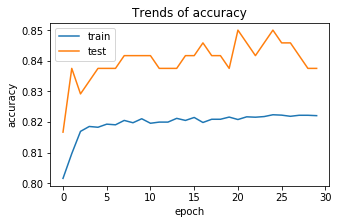



ACC:  0.8235
AUC:  0.7645821339547216
Log Loss:  0.4336816921159625


Confusion Matrix: 
[[4435  226]
 [ 833  506]]


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      4661
         1.0       0.69      0.38      0.49      1339

   micro avg       0.82      0.82      0.82      6000
   macro avg       0.77      0.66      0.69      6000
weighted avg       0.81      0.82      0.80      6000



In [58]:
### train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop('default payment next month',axis=1), y, test_size = 0.2, random_state=5)

### split small data
payAMT_data_x_train = x_train.iloc[:, 0:6]
payAMT_data_x_test = x_test.iloc[:, 0:6]

payAMT_data_x_train = payAMT_data_x_train.values.reshape([len(payAMT_data_x_train), len(payAMT_data_x_train.columns), 1])
payAMT_data_x_test = payAMT_data_x_test.values.reshape([len(payAMT_data_x_test), len(payAMT_data_x_test.columns), 1])

BILL_data_x_train = x_train.iloc[:, 6:12]
BILL_data_x_test = x_test.iloc[:, 6:12]

BILL_data_x_train = BILL_data_x_train.values.reshape([len(BILL_data_x_train), len(BILL_data_x_train.columns), 1])
BILL_data_x_test = BILL_data_x_test.values.reshape([len(BILL_data_x_test), len(BILL_data_x_test.columns), 1])

PAY_data_x_train = x_train.iloc[:, 12:18]
PAY_data_x_test = x_test.iloc[:, 12:18]

PAY_data_x_train = PAY_data_x_train.values.reshape([len(PAY_data_x_train), len(PAY_data_x_train.columns), 1])
PAY_data_x_test = PAY_data_x_test.values.reshape([len(PAY_data_x_test), len(PAY_data_x_test.columns), 1])

demo_data_x_train = x_train.iloc[:, 18:]
demo_data_x_test = x_test.iloc[:, 18:]

demo_data_x_train = demo_data_x_train.values.reshape([len(demo_data_x_train), len(demo_data_x_train.columns), 1])
demo_data_x_test = demo_data_x_test.values.reshape([len(demo_data_x_test), len(demo_data_x_test.columns), 1])

### model run
input1 = Input(shape=(6,1))
#pay = GRU(20, return_sequences=True)(input1)
pay = GRU(20)(input1)
pay = Dense(20, activation='tanh')(pay)
pay = Dropout(0.2)(pay)
    
input2 = Input(shape=(6,1))
#bill = GRU(20, return_sequences=True)(input2)
bill = GRU(20)(input2)
bill = Dense(20, activation='tanh')(bill)
bill = Dropout(0.2)(bill)

input3 = Input(shape=(6,1))
#pay_amt = GRU(20, return_sequences=True)(input3)
pay_amt = GRU(20)(input3)
pay_amt = Dense(20, activation='tanh')(pay_amt)
pay_amt = Dropout(0.2)(pay_amt)

input4 = Input(shape=(5,1))
demo = GRU(20)(input4)
demo = Dense(20, activation= 'tanh')(demo)
demo = Dropout(0.2)(demo)


merge = concatenate([pay, bill, pay_amt, demo])
    
hidden1 = Dense(20, activation='tanh')(merge)
    
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=[input1, input2, input3, input4], outputs=output)
    
model.summary()
    
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


BATCH_SIZE = 64

history = model.fit([PAY_data_x_train, BILL_data_x_train, payAMT_data_x_train, demo_data_x_train],
                    y_train, batch_size = BATCH_SIZE, epochs=30, verbose=0, validation_split = 0.01)

# summarize history for accuracy in val
plt.figure(figsize=(5, 3))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Trends of accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
pred_proba = model.predict([PAY_data_x_test, BILL_data_x_test, payAMT_data_x_test, demo_data_x_test])
pred = (pred_proba > 0.5).astype(int)
print('\n')
print('ACC: ',accuracy_score(y_test, pred))
print('AUC: ',roc_auc_score(y_test, pred_proba))
print('Log Loss: ', log_loss(pd.get_dummies(y_test), pred_proba))
print('\n')
print('Confusion Matrix: ')
print(confusion_matrix(y_test, pred))
print('\n')
print('Classification Report: ')
print(classification_report(y_test, pred))
acc.append(accuracy_score(y_test, pred))

# result

In [59]:
acc


[0.8198333333333333, 0.822, 0.832, 0.8171666666666667, 0.8235]

In [60]:
print(np.mean(acc))
print(np.std(acc))

0.8229
0.0050250483690319776


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_108 (InputLayer)          (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_109 (InputLayer)          (None, 5, 1)         0                                            
__________________________________________________________________________________________________
gru_109 (GRU)                   (None, 20)           1320        input_108[0][0]                  
__________________________________________________________________________________________________
gru_110 (GRU)                   (None, 20)           1320        input_109[0][0]                  
__________________________________________________________________________________________________
dense_177 

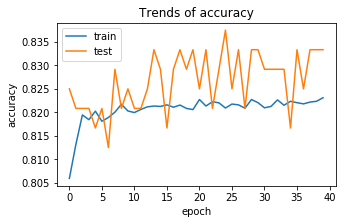



ACC:  0.8196666666666667
AUC:  0.7493332591218027
Log Loss:  0.44268496908371646


Confusion Matrix: 
[[4476  187]
 [ 895  442]]


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      4663
         1.0       0.70      0.33      0.45      1337

   micro avg       0.82      0.82      0.82      6000
   macro avg       0.77      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000



In [66]:
### train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop('default payment next month',axis=1), y, test_size = 0.2, random_state=1)

### split small data
payAMT_data_x_train = x_train.iloc[:, 0:6]
payAMT_data_x_test = x_test.iloc[:, 0:6]

payAMT_data_x_train = payAMT_data_x_train.values.reshape([len(payAMT_data_x_train), len(payAMT_data_x_train.columns), 1])
payAMT_data_x_test = payAMT_data_x_test.values.reshape([len(payAMT_data_x_test), len(payAMT_data_x_test.columns), 1])

BILL_data_x_train = x_train.iloc[:, 6:12]
BILL_data_x_test = x_test.iloc[:, 6:12]

BILL_data_x_train = BILL_data_x_train.values.reshape([len(BILL_data_x_train), len(BILL_data_x_train.columns), 1])
BILL_data_x_test = BILL_data_x_test.values.reshape([len(BILL_data_x_test), len(BILL_data_x_test.columns), 1])

PAY_data_x_train = x_train.iloc[:, 12:18]
PAY_data_x_test = x_test.iloc[:, 12:18]

PAY_data_x_train = PAY_data_x_train.values.reshape([len(PAY_data_x_train), len(PAY_data_x_train.columns), 1])
PAY_data_x_test = PAY_data_x_test.values.reshape([len(PAY_data_x_test), len(PAY_data_x_test.columns), 1])

demo_data_x_train = x_train.iloc[:, 18:]
demo_data_x_test = x_test.iloc[:, 18:]

demo_data_x_train = demo_data_x_train.values.reshape([len(demo_data_x_train), len(demo_data_x_train.columns), 1])
demo_data_x_test = demo_data_x_test.values.reshape([len(demo_data_x_test), len(demo_data_x_test.columns), 1])


### model run
input1 = Input(shape=(6,1))
#pay = GRU(20, return_sequences=True)(input1)
pay = GRU(20)(input1)
pay = Dense(20, activation='tanh')(pay)
pay = Dropout(0.2)(pay)
    
#input2 = Input(shape=(6,1))
#bill = GRU(20, return_sequences=True)(input2)
#bill = GRU(20)(input2)
#bill = Dense(20, activation='tanh')(bill)
#bill = Dropout(0.2)(bill)

#input3 = Input(shape=(6,1))
#pay_amt = GRU(20, return_sequences=True)(input3)
#pay_amt = GRU(20)(input3)
#pay_amt = Dense(20, activation='tanh')(pay_amt)
#pay_amt = Dropout(0.2)(pay_amt)

input4 = Input(shape=(5,1))
demo = GRU(20)(input4)
demo = Dense(20, activation= 'tanh')(demo)
demo = Dropout(0.2)(demo)


merge = concatenate([pay, demo])
    
hidden1 = Dense(20, activation='tanh')(merge)
    
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=[input1,input4], outputs=output)
    
model.summary()
    
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


BATCH_SIZE = 64

history = model.fit([PAY_data_x_train, demo_data_x_train],
                    y_train, batch_size = BATCH_SIZE, epochs=40, verbose=0, validation_split = 0.01)

# summarize history for accuracy in val
plt.figure(figsize=(5, 3))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Trends of accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
pred_proba = model.predict([PAY_data_x_test, demo_data_x_test])
pred = (pred_proba > 0.5).astype(int)
print('\n')
print('ACC: ',accuracy_score(y_test, pred))
print('AUC: ',roc_auc_score(y_test, pred_proba))
print('Log Loss: ', log_loss(pd.get_dummies(y_test), pred_proba))
print('\n')
print('Confusion Matrix: ')
print(confusion_matrix(y_test, pred))
print('\n')
print('Classification Report: ')
print(classification_report(y_test, pred))
test_acc = []
test_acc.append(accuracy_score(y_test, pred))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_110 (InputLayer)          (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_111 (InputLayer)          (None, 5, 1)         0                                            
__________________________________________________________________________________________________
gru_111 (GRU)                   (None, 20)           1320        input_110[0][0]                  
__________________________________________________________________________________________________
gru_112 (GRU)                   (None, 20)           1320        input_111[0][0]                  
__________________________________________________________________________________________________
dense_181 

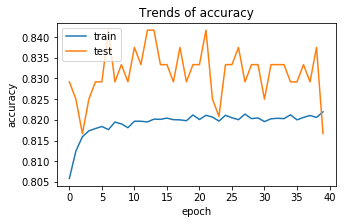



ACC:  0.8193333333333334
AUC:  0.7615197241390385
Log Loss:  0.43545331674441695


Confusion Matrix: 
[[4442  223]
 [ 861  474]]


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      4665
         1.0       0.68      0.36      0.47      1335

   micro avg       0.82      0.82      0.82      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [67]:
### train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop('default payment next month',axis=1), y, test_size = 0.2, random_state=2)

### split small data
payAMT_data_x_train = x_train.iloc[:, 0:6]
payAMT_data_x_test = x_test.iloc[:, 0:6]

payAMT_data_x_train = payAMT_data_x_train.values.reshape([len(payAMT_data_x_train), len(payAMT_data_x_train.columns), 1])
payAMT_data_x_test = payAMT_data_x_test.values.reshape([len(payAMT_data_x_test), len(payAMT_data_x_test.columns), 1])

BILL_data_x_train = x_train.iloc[:, 6:12]
BILL_data_x_test = x_test.iloc[:, 6:12]

BILL_data_x_train = BILL_data_x_train.values.reshape([len(BILL_data_x_train), len(BILL_data_x_train.columns), 1])
BILL_data_x_test = BILL_data_x_test.values.reshape([len(BILL_data_x_test), len(BILL_data_x_test.columns), 1])

PAY_data_x_train = x_train.iloc[:, 12:18]
PAY_data_x_test = x_test.iloc[:, 12:18]

PAY_data_x_train = PAY_data_x_train.values.reshape([len(PAY_data_x_train), len(PAY_data_x_train.columns), 1])
PAY_data_x_test = PAY_data_x_test.values.reshape([len(PAY_data_x_test), len(PAY_data_x_test.columns), 1])

demo_data_x_train = x_train.iloc[:, 18:]
demo_data_x_test = x_test.iloc[:, 18:]

demo_data_x_train = demo_data_x_train.values.reshape([len(demo_data_x_train), len(demo_data_x_train.columns), 1])
demo_data_x_test = demo_data_x_test.values.reshape([len(demo_data_x_test), len(demo_data_x_test.columns), 1])


### model run
input1 = Input(shape=(6,1))
#pay = GRU(20, return_sequences=True)(input1)
pay = GRU(20)(input1)
pay = Dense(20, activation='tanh')(pay)
pay = Dropout(0.2)(pay)
    
#input2 = Input(shape=(6,1))
#bill = GRU(20, return_sequences=True)(input2)
#bill = GRU(20)(input2)
#bill = Dense(20, activation='tanh')(bill)
#bill = Dropout(0.2)(bill)

#input3 = Input(shape=(6,1))
#pay_amt = GRU(20, return_sequences=True)(input3)
#pay_amt = GRU(20)(input3)
#pay_amt = Dense(20, activation='tanh')(pay_amt)
#pay_amt = Dropout(0.2)(pay_amt)

input4 = Input(shape=(5,1))
demo = GRU(20)(input4)
demo = Dense(20, activation= 'tanh')(demo)
demo = Dropout(0.2)(demo)


merge = concatenate([pay, demo])
    
hidden1 = Dense(20, activation='tanh')(merge)
    
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=[input1,input4], outputs=output)
    
model.summary()
    
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


BATCH_SIZE = 64

history = model.fit([PAY_data_x_train, demo_data_x_train],
                    y_train, batch_size = BATCH_SIZE, epochs=40, verbose=0, validation_split = 0.01)

# summarize history for accuracy in val
plt.figure(figsize=(5, 3))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Trends of accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
pred_proba = model.predict([PAY_data_x_test, demo_data_x_test])
pred = (pred_proba > 0.5).astype(int)
print('\n')
print('ACC: ',accuracy_score(y_test, pred))
print('AUC: ',roc_auc_score(y_test, pred_proba))
print('Log Loss: ', log_loss(pd.get_dummies(y_test), pred_proba))
print('\n')
print('Confusion Matrix: ')
print(confusion_matrix(y_test, pred))
print('\n')
print('Classification Report: ')
print(classification_report(y_test, pred))

test_acc.append(accuracy_score(y_test, pred))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_112 (InputLayer)          (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_113 (InputLayer)          (None, 5, 1)         0                                            
__________________________________________________________________________________________________
gru_113 (GRU)                   (None, 20)           1320        input_112[0][0]                  
__________________________________________________________________________________________________
gru_114 (GRU)                   (None, 20)           1320        input_113[0][0]                  
__________________________________________________________________________________________________
dense_185 

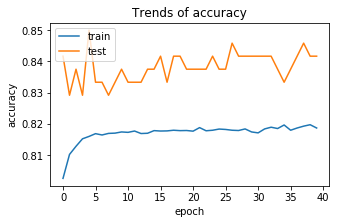



ACC:  0.8313333333333334
AUC:  0.7716602046666361
Log Loss:  0.4172621199004352


Confusion Matrix: 
[[4525  223]
 [ 789  463]]


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90      4748
         1.0       0.67      0.37      0.48      1252

   micro avg       0.83      0.83      0.83      6000
   macro avg       0.76      0.66      0.69      6000
weighted avg       0.81      0.83      0.81      6000



In [68]:
### train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop('default payment next month',axis=1), y, test_size = 0.2, random_state=3)

### split small data
payAMT_data_x_train = x_train.iloc[:, 0:6]
payAMT_data_x_test = x_test.iloc[:, 0:6]

payAMT_data_x_train = payAMT_data_x_train.values.reshape([len(payAMT_data_x_train), len(payAMT_data_x_train.columns), 1])
payAMT_data_x_test = payAMT_data_x_test.values.reshape([len(payAMT_data_x_test), len(payAMT_data_x_test.columns), 1])

BILL_data_x_train = x_train.iloc[:, 6:12]
BILL_data_x_test = x_test.iloc[:, 6:12]

BILL_data_x_train = BILL_data_x_train.values.reshape([len(BILL_data_x_train), len(BILL_data_x_train.columns), 1])
BILL_data_x_test = BILL_data_x_test.values.reshape([len(BILL_data_x_test), len(BILL_data_x_test.columns), 1])

PAY_data_x_train = x_train.iloc[:, 12:18]
PAY_data_x_test = x_test.iloc[:, 12:18]

PAY_data_x_train = PAY_data_x_train.values.reshape([len(PAY_data_x_train), len(PAY_data_x_train.columns), 1])
PAY_data_x_test = PAY_data_x_test.values.reshape([len(PAY_data_x_test), len(PAY_data_x_test.columns), 1])

demo_data_x_train = x_train.iloc[:, 18:]
demo_data_x_test = x_test.iloc[:, 18:]

demo_data_x_train = demo_data_x_train.values.reshape([len(demo_data_x_train), len(demo_data_x_train.columns), 1])
demo_data_x_test = demo_data_x_test.values.reshape([len(demo_data_x_test), len(demo_data_x_test.columns), 1])


### model run
input1 = Input(shape=(6,1))
#pay = GRU(20, return_sequences=True)(input1)
pay = GRU(20)(input1)
pay = Dense(20, activation='tanh')(pay)
pay = Dropout(0.2)(pay)
    
#input2 = Input(shape=(6,1))
#bill = GRU(20, return_sequences=True)(input2)
#bill = GRU(20)(input2)
#bill = Dense(20, activation='tanh')(bill)
#bill = Dropout(0.2)(bill)

#input3 = Input(shape=(6,1))
#pay_amt = GRU(20, return_sequences=True)(input3)
#pay_amt = GRU(20)(input3)
#pay_amt = Dense(20, activation='tanh')(pay_amt)
#pay_amt = Dropout(0.2)(pay_amt)

input4 = Input(shape=(5,1))
demo = GRU(20)(input4)
demo = Dense(20, activation= 'tanh')(demo)
demo = Dropout(0.2)(demo)


merge = concatenate([pay, demo])
    
hidden1 = Dense(20, activation='tanh')(merge)
    
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=[input1,input4], outputs=output)
    
model.summary()
    
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


BATCH_SIZE = 64

history = model.fit([PAY_data_x_train, demo_data_x_train],
                    y_train, batch_size = BATCH_SIZE, epochs=40, verbose=0, validation_split = 0.01)

# summarize history for accuracy in val
plt.figure(figsize=(5, 3))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Trends of accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
pred_proba = model.predict([PAY_data_x_test, demo_data_x_test])
pred = (pred_proba > 0.5).astype(int)
print('\n')
print('ACC: ',accuracy_score(y_test, pred))
print('AUC: ',roc_auc_score(y_test, pred_proba))
print('Log Loss: ', log_loss(pd.get_dummies(y_test), pred_proba))
print('\n')
print('Confusion Matrix: ')
print(confusion_matrix(y_test, pred))
print('\n')
print('Classification Report: ')
print(classification_report(y_test, pred))

test_acc.append(accuracy_score(y_test, pred))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_114 (InputLayer)          (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_115 (InputLayer)          (None, 5, 1)         0                                            
__________________________________________________________________________________________________
gru_115 (GRU)                   (None, 20)           1320        input_114[0][0]                  
__________________________________________________________________________________________________
gru_116 (GRU)                   (None, 20)           1320        input_115[0][0]                  
__________________________________________________________________________________________________
dense_189 

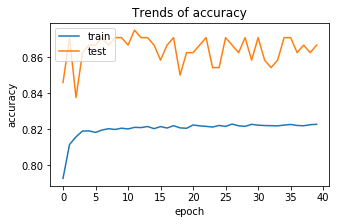



ACC:  0.8171666666666667
AUC:  0.7524886986706889
Log Loss:  0.4438189749183754


Confusion Matrix: 
[[4441  197]
 [ 900  462]]


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      4638
         1.0       0.70      0.34      0.46      1362

   micro avg       0.82      0.82      0.82      6000
   macro avg       0.77      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000



In [69]:
### train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop('default payment next month',axis=1), y, test_size = 0.2, random_state=4)

### split small data
payAMT_data_x_train = x_train.iloc[:, 0:6]
payAMT_data_x_test = x_test.iloc[:, 0:6]

payAMT_data_x_train = payAMT_data_x_train.values.reshape([len(payAMT_data_x_train), len(payAMT_data_x_train.columns), 1])
payAMT_data_x_test = payAMT_data_x_test.values.reshape([len(payAMT_data_x_test), len(payAMT_data_x_test.columns), 1])

BILL_data_x_train = x_train.iloc[:, 6:12]
BILL_data_x_test = x_test.iloc[:, 6:12]

BILL_data_x_train = BILL_data_x_train.values.reshape([len(BILL_data_x_train), len(BILL_data_x_train.columns), 1])
BILL_data_x_test = BILL_data_x_test.values.reshape([len(BILL_data_x_test), len(BILL_data_x_test.columns), 1])

PAY_data_x_train = x_train.iloc[:, 12:18]
PAY_data_x_test = x_test.iloc[:, 12:18]

PAY_data_x_train = PAY_data_x_train.values.reshape([len(PAY_data_x_train), len(PAY_data_x_train.columns), 1])
PAY_data_x_test = PAY_data_x_test.values.reshape([len(PAY_data_x_test), len(PAY_data_x_test.columns), 1])

demo_data_x_train = x_train.iloc[:, 18:]
demo_data_x_test = x_test.iloc[:, 18:]

demo_data_x_train = demo_data_x_train.values.reshape([len(demo_data_x_train), len(demo_data_x_train.columns), 1])
demo_data_x_test = demo_data_x_test.values.reshape([len(demo_data_x_test), len(demo_data_x_test.columns), 1])


### model run
input1 = Input(shape=(6,1))
#pay = GRU(20, return_sequences=True)(input1)
pay = GRU(20)(input1)
pay = Dense(20, activation='tanh')(pay)
pay = Dropout(0.2)(pay)
    
#input2 = Input(shape=(6,1))
#bill = GRU(20, return_sequences=True)(input2)
#bill = GRU(20)(input2)
#bill = Dense(20, activation='tanh')(bill)
#bill = Dropout(0.2)(bill)

#input3 = Input(shape=(6,1))
#pay_amt = GRU(20, return_sequences=True)(input3)
#pay_amt = GRU(20)(input3)
#pay_amt = Dense(20, activation='tanh')(pay_amt)
#pay_amt = Dropout(0.2)(pay_amt)

input4 = Input(shape=(5,1))
demo = GRU(20)(input4)
demo = Dense(20, activation= 'tanh')(demo)
demo = Dropout(0.2)(demo)


merge = concatenate([pay, demo])
    
hidden1 = Dense(20, activation='tanh')(merge)
    
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=[input1,input4], outputs=output)
    
model.summary()
    
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


BATCH_SIZE = 64

history = model.fit([PAY_data_x_train, demo_data_x_train],
                    y_train, batch_size = BATCH_SIZE, epochs=40, verbose=0, validation_split = 0.01)

# summarize history for accuracy in val
plt.figure(figsize=(5, 3))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Trends of accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
pred_proba = model.predict([PAY_data_x_test, demo_data_x_test])
pred = (pred_proba > 0.5).astype(int)
print('\n')
print('ACC: ',accuracy_score(y_test, pred))
print('AUC: ',roc_auc_score(y_test, pred_proba))
print('Log Loss: ', log_loss(pd.get_dummies(y_test), pred_proba))
print('\n')
print('Confusion Matrix: ')
print(confusion_matrix(y_test, pred))
print('\n')
print('Classification Report: ')
print(classification_report(y_test, pred))

test_acc.append(accuracy_score(y_test, pred))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_116 (InputLayer)          (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_117 (InputLayer)          (None, 5, 1)         0                                            
__________________________________________________________________________________________________
gru_117 (GRU)                   (None, 20)           1320        input_116[0][0]                  
__________________________________________________________________________________________________
gru_118 (GRU)                   (None, 20)           1320        input_117[0][0]                  
__________________________________________________________________________________________________
dense_193 

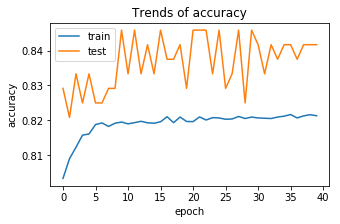



ACC:  0.8225
AUC:  0.759638757977587
Log Loss:  0.4344528266067306


Confusion Matrix: 
[[4444  217]
 [ 848  491]]


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      4661
         1.0       0.69      0.37      0.48      1339

   micro avg       0.82      0.82      0.82      6000
   macro avg       0.77      0.66      0.69      6000
weighted avg       0.81      0.82      0.80      6000



In [70]:
### train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop('default payment next month',axis=1), y, test_size = 0.2, random_state=5)

### split small data
payAMT_data_x_train = x_train.iloc[:, 0:6]
payAMT_data_x_test = x_test.iloc[:, 0:6]

payAMT_data_x_train = payAMT_data_x_train.values.reshape([len(payAMT_data_x_train), len(payAMT_data_x_train.columns), 1])
payAMT_data_x_test = payAMT_data_x_test.values.reshape([len(payAMT_data_x_test), len(payAMT_data_x_test.columns), 1])

BILL_data_x_train = x_train.iloc[:, 6:12]
BILL_data_x_test = x_test.iloc[:, 6:12]

BILL_data_x_train = BILL_data_x_train.values.reshape([len(BILL_data_x_train), len(BILL_data_x_train.columns), 1])
BILL_data_x_test = BILL_data_x_test.values.reshape([len(BILL_data_x_test), len(BILL_data_x_test.columns), 1])

PAY_data_x_train = x_train.iloc[:, 12:18]
PAY_data_x_test = x_test.iloc[:, 12:18]

PAY_data_x_train = PAY_data_x_train.values.reshape([len(PAY_data_x_train), len(PAY_data_x_train.columns), 1])
PAY_data_x_test = PAY_data_x_test.values.reshape([len(PAY_data_x_test), len(PAY_data_x_test.columns), 1])

demo_data_x_train = x_train.iloc[:, 18:]
demo_data_x_test = x_test.iloc[:, 18:]

demo_data_x_train = demo_data_x_train.values.reshape([len(demo_data_x_train), len(demo_data_x_train.columns), 1])
demo_data_x_test = demo_data_x_test.values.reshape([len(demo_data_x_test), len(demo_data_x_test.columns), 1])


### model run
input1 = Input(shape=(6,1))
#pay = GRU(20, return_sequences=True)(input1)
pay = GRU(20)(input1)
pay = Dense(20, activation='tanh')(pay)
pay = Dropout(0.2)(pay)
    
#input2 = Input(shape=(6,1))
#bill = GRU(20, return_sequences=True)(input2)
#bill = GRU(20)(input2)
#bill = Dense(20, activation='tanh')(bill)
#bill = Dropout(0.2)(bill)

#input3 = Input(shape=(6,1))
#pay_amt = GRU(20, return_sequences=True)(input3)
#pay_amt = GRU(20)(input3)
#pay_amt = Dense(20, activation='tanh')(pay_amt)
#pay_amt = Dropout(0.2)(pay_amt)

input4 = Input(shape=(5,1))
demo = GRU(20)(input4)
demo = Dense(20, activation= 'tanh')(demo)
demo = Dropout(0.2)(demo)


merge = concatenate([pay, demo])
    
hidden1 = Dense(20, activation='tanh')(merge)
    
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=[input1,input4], outputs=output)
    
model.summary()
    
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


BATCH_SIZE = 64

history = model.fit([PAY_data_x_train, demo_data_x_train],
                    y_train, batch_size = BATCH_SIZE, epochs=40, verbose=0, validation_split = 0.01)

# summarize history for accuracy in val
plt.figure(figsize=(5, 3))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Trends of accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
pred_proba = model.predict([PAY_data_x_test, demo_data_x_test])
pred = (pred_proba > 0.5).astype(int)
print('\n')
print('ACC: ',accuracy_score(y_test, pred))
print('AUC: ',roc_auc_score(y_test, pred_proba))
print('Log Loss: ', log_loss(pd.get_dummies(y_test), pred_proba))
print('\n')
print('Confusion Matrix: ')
print(confusion_matrix(y_test, pred))
print('\n')
print('Classification Report: ')
print(classification_report(y_test, pred))

test_acc.append(accuracy_score(y_test, pred))

In [71]:
test_acc


[0.8198333333333333, 0.822, 0.832, 0.8171666666666667, 0.8235]

In [72]:
print(np.mean(test_acc))
print(np.std(test_acc))

0.8229
0.0050250483690319776


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_120 (InputLayer)          (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_121 (InputLayer)          (None, 5, 1)         0                                            
__________________________________________________________________________________________________
gru_121 (GRU)                   (None, 20)           1320        input_120[0][0]                  
__________________________________________________________________________________________________
gru_122 (GRU)                   (None, 20)           1320        input_121[0][0]                  
__________________________________________________________________________________________________
concatenat

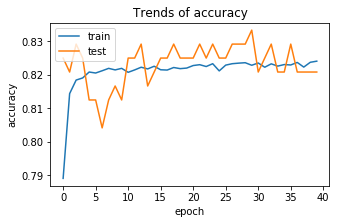



ACC:  0.8195
AUC:  0.7535410208245146
Log Loss:  0.44215124677245815


Confusion Matrix: 
[[4444  219]
 [ 864  473]]


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      4663
         1.0       0.68      0.35      0.47      1337

   micro avg       0.82      0.82      0.82      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [74]:
### train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop('default payment next month',axis=1), y, test_size = 0.2, random_state=1)

### split small data
payAMT_data_x_train = x_train.iloc[:, 0:6]
payAMT_data_x_test = x_test.iloc[:, 0:6]

payAMT_data_x_train = payAMT_data_x_train.values.reshape([len(payAMT_data_x_train), len(payAMT_data_x_train.columns), 1])
payAMT_data_x_test = payAMT_data_x_test.values.reshape([len(payAMT_data_x_test), len(payAMT_data_x_test.columns), 1])

BILL_data_x_train = x_train.iloc[:, 6:12]
BILL_data_x_test = x_test.iloc[:, 6:12]

BILL_data_x_train = BILL_data_x_train.values.reshape([len(BILL_data_x_train), len(BILL_data_x_train.columns), 1])
BILL_data_x_test = BILL_data_x_test.values.reshape([len(BILL_data_x_test), len(BILL_data_x_test.columns), 1])

PAY_data_x_train = x_train.iloc[:, 12:18]
PAY_data_x_test = x_test.iloc[:, 12:18]

PAY_data_x_train = PAY_data_x_train.values.reshape([len(PAY_data_x_train), len(PAY_data_x_train.columns), 1])
PAY_data_x_test = PAY_data_x_test.values.reshape([len(PAY_data_x_test), len(PAY_data_x_test.columns), 1])

demo_data_x_train = x_train.iloc[:, 18:]
demo_data_x_test = x_test.iloc[:, 18:]

demo_data_x_train = demo_data_x_train.values.reshape([len(demo_data_x_train), len(demo_data_x_train.columns), 1])
demo_data_x_test = demo_data_x_test.values.reshape([len(demo_data_x_test), len(demo_data_x_test.columns), 1])


### model run
input1 = Input(shape=(6,1))
#pay = GRU(20, return_sequences=True)(input1)
pay = GRU(20)(input1)
#pay = Dense(20, activation='tanh')(pay)
#pay = Dropout(0.2)(pay)
    
#input2 = Input(shape=(6,1))
#bill = GRU(20, return_sequences=True)(input2)
#bill = GRU(20)(input2)
#bill = Dense(20, activation='tanh')(bill)
#bill = Dropout(0.2)(bill)

#input3 = Input(shape=(6,1))
#pay_amt = GRU(20, return_sequences=True)(input3)
#pay_amt = GRU(20)(input3)
#pay_amt = Dense(20, activation='tanh')(pay_amt)
#pay_amt = Dropout(0.2)(pay_amt)

input4 = Input(shape=(5,1))
demo = GRU(20)(input4)
#demo = Dense(20, activation= 'tanh')(demo)
#demo = Dropout(0.2)(demo)


merge = concatenate([pay, demo])
    
hidden1 = Dense(20, activation='tanh')(merge)
    
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=[input1,input4], outputs=output)
    
model.summary()
    
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


BATCH_SIZE = 64

history = model.fit([PAY_data_x_train, demo_data_x_train],
                    y_train, batch_size = BATCH_SIZE, epochs=40, verbose=0, validation_split = 0.01)

# summarize history for accuracy in val
plt.figure(figsize=(5, 3))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Trends of accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
pred_proba = model.predict([PAY_data_x_test, demo_data_x_test])
pred = (pred_proba > 0.5).astype(int)
print('\n')
print('ACC: ',accuracy_score(y_test, pred))
print('AUC: ',roc_auc_score(y_test, pred_proba))
print('Log Loss: ', log_loss(pd.get_dummies(y_test), pred_proba))
print('\n')
print('Confusion Matrix: ')
print(confusion_matrix(y_test, pred))
print('\n')
print('Classification Report: ')
print(classification_report(y_test, pred))

test_acc_2 = []
test_acc_2.append(accuracy_score(y_test, pred))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_122 (InputLayer)          (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_123 (InputLayer)          (None, 5, 1)         0                                            
__________________________________________________________________________________________________
gru_123 (GRU)                   (None, 20)           1320        input_122[0][0]                  
__________________________________________________________________________________________________
gru_124 (GRU)                   (None, 20)           1320        input_123[0][0]                  
__________________________________________________________________________________________________
concatenat

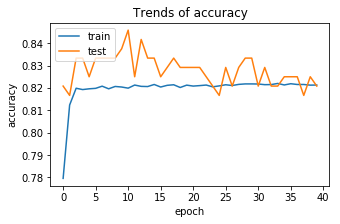



ACC:  0.8201666666666667
AUC:  0.7611256829284938
Log Loss:  0.4356968303757409


Confusion Matrix: 
[[4450  215]
 [ 864  471]]


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      4665
         1.0       0.69      0.35      0.47      1335

   micro avg       0.82      0.82      0.82      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [75]:
### train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop('default payment next month',axis=1), y, test_size = 0.2, random_state=2)

### split small data
payAMT_data_x_train = x_train.iloc[:, 0:6]
payAMT_data_x_test = x_test.iloc[:, 0:6]

payAMT_data_x_train = payAMT_data_x_train.values.reshape([len(payAMT_data_x_train), len(payAMT_data_x_train.columns), 1])
payAMT_data_x_test = payAMT_data_x_test.values.reshape([len(payAMT_data_x_test), len(payAMT_data_x_test.columns), 1])

BILL_data_x_train = x_train.iloc[:, 6:12]
BILL_data_x_test = x_test.iloc[:, 6:12]

BILL_data_x_train = BILL_data_x_train.values.reshape([len(BILL_data_x_train), len(BILL_data_x_train.columns), 1])
BILL_data_x_test = BILL_data_x_test.values.reshape([len(BILL_data_x_test), len(BILL_data_x_test.columns), 1])

PAY_data_x_train = x_train.iloc[:, 12:18]
PAY_data_x_test = x_test.iloc[:, 12:18]

PAY_data_x_train = PAY_data_x_train.values.reshape([len(PAY_data_x_train), len(PAY_data_x_train.columns), 1])
PAY_data_x_test = PAY_data_x_test.values.reshape([len(PAY_data_x_test), len(PAY_data_x_test.columns), 1])

demo_data_x_train = x_train.iloc[:, 18:]
demo_data_x_test = x_test.iloc[:, 18:]

demo_data_x_train = demo_data_x_train.values.reshape([len(demo_data_x_train), len(demo_data_x_train.columns), 1])
demo_data_x_test = demo_data_x_test.values.reshape([len(demo_data_x_test), len(demo_data_x_test.columns), 1])


### model run
input1 = Input(shape=(6,1))
#pay = GRU(20, return_sequences=True)(input1)
pay = GRU(20)(input1)
#pay = Dense(20, activation='tanh')(pay)
#pay = Dropout(0.2)(pay)
    
#input2 = Input(shape=(6,1))
#bill = GRU(20, return_sequences=True)(input2)
#bill = GRU(20)(input2)
#bill = Dense(20, activation='tanh')(bill)
#bill = Dropout(0.2)(bill)

#input3 = Input(shape=(6,1))
#pay_amt = GRU(20, return_sequences=True)(input3)
#pay_amt = GRU(20)(input3)
#pay_amt = Dense(20, activation='tanh')(pay_amt)
#pay_amt = Dropout(0.2)(pay_amt)

input4 = Input(shape=(5,1))
demo = GRU(20)(input4)
#demo = Dense(20, activation= 'tanh')(demo)
#demo = Dropout(0.2)(demo)


merge = concatenate([pay, demo])
    
hidden1 = Dense(20, activation='tanh')(merge)
    
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=[input1,input4], outputs=output)
    
model.summary()
    
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


BATCH_SIZE = 64

history = model.fit([PAY_data_x_train, demo_data_x_train],
                    y_train, batch_size = BATCH_SIZE, epochs=40, verbose=0, validation_split = 0.01)

# summarize history for accuracy in val
plt.figure(figsize=(5, 3))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Trends of accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
pred_proba = model.predict([PAY_data_x_test, demo_data_x_test])
pred = (pred_proba > 0.5).astype(int)
print('\n')
print('ACC: ',accuracy_score(y_test, pred))
print('AUC: ',roc_auc_score(y_test, pred_proba))
print('Log Loss: ', log_loss(pd.get_dummies(y_test), pred_proba))
print('\n')
print('Confusion Matrix: ')
print(confusion_matrix(y_test, pred))
print('\n')
print('Classification Report: ')
print(classification_report(y_test, pred))


test_acc_2.append(accuracy_score(y_test, pred))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_124 (InputLayer)          (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_125 (InputLayer)          (None, 5, 1)         0                                            
__________________________________________________________________________________________________
gru_125 (GRU)                   (None, 20)           1320        input_124[0][0]                  
__________________________________________________________________________________________________
gru_126 (GRU)                   (None, 20)           1320        input_125[0][0]                  
__________________________________________________________________________________________________
concatenat

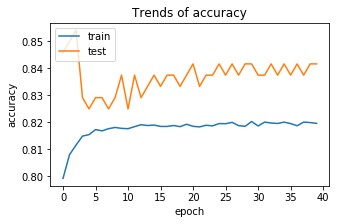



ACC:  0.8326666666666667
AUC:  0.7715341216479916
Log Loss:  0.41621570993463197


Confusion Matrix: 
[[4506  242]
 [ 762  490]]


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      4748
         1.0       0.67      0.39      0.49      1252

   micro avg       0.83      0.83      0.83      6000
   macro avg       0.76      0.67      0.70      6000
weighted avg       0.82      0.83      0.82      6000



In [76]:
### train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop('default payment next month',axis=1), y, test_size = 0.2, random_state=3)

### split small data
payAMT_data_x_train = x_train.iloc[:, 0:6]
payAMT_data_x_test = x_test.iloc[:, 0:6]

payAMT_data_x_train = payAMT_data_x_train.values.reshape([len(payAMT_data_x_train), len(payAMT_data_x_train.columns), 1])
payAMT_data_x_test = payAMT_data_x_test.values.reshape([len(payAMT_data_x_test), len(payAMT_data_x_test.columns), 1])

BILL_data_x_train = x_train.iloc[:, 6:12]
BILL_data_x_test = x_test.iloc[:, 6:12]

BILL_data_x_train = BILL_data_x_train.values.reshape([len(BILL_data_x_train), len(BILL_data_x_train.columns), 1])
BILL_data_x_test = BILL_data_x_test.values.reshape([len(BILL_data_x_test), len(BILL_data_x_test.columns), 1])

PAY_data_x_train = x_train.iloc[:, 12:18]
PAY_data_x_test = x_test.iloc[:, 12:18]

PAY_data_x_train = PAY_data_x_train.values.reshape([len(PAY_data_x_train), len(PAY_data_x_train.columns), 1])
PAY_data_x_test = PAY_data_x_test.values.reshape([len(PAY_data_x_test), len(PAY_data_x_test.columns), 1])

demo_data_x_train = x_train.iloc[:, 18:]
demo_data_x_test = x_test.iloc[:, 18:]

demo_data_x_train = demo_data_x_train.values.reshape([len(demo_data_x_train), len(demo_data_x_train.columns), 1])
demo_data_x_test = demo_data_x_test.values.reshape([len(demo_data_x_test), len(demo_data_x_test.columns), 1])


### model run
input1 = Input(shape=(6,1))
pay = GRU(20)(input1)

input4 = Input(shape=(5,1))
demo = GRU(20)(input4)

merge = concatenate([pay, demo])
    
hidden1 = Dense(20, activation='tanh')(merge)
    
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=[input1,input4], outputs=output)
    
model.summary()
    
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


BATCH_SIZE = 64

history = model.fit([PAY_data_x_train, demo_data_x_train],
                    y_train, batch_size = BATCH_SIZE, epochs=40, verbose=0, validation_split = 0.01)

# summarize history for accuracy in val
plt.figure(figsize=(5, 3))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Trends of accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
pred_proba = model.predict([PAY_data_x_test, demo_data_x_test])
pred = (pred_proba > 0.5).astype(int)
print('\n')
print('ACC: ',accuracy_score(y_test, pred))
print('AUC: ',roc_auc_score(y_test, pred_proba))
print('Log Loss: ', log_loss(pd.get_dummies(y_test), pred_proba))
print('\n')
print('Confusion Matrix: ')
print(confusion_matrix(y_test, pred))
print('\n')
print('Classification Report: ')
print(classification_report(y_test, pred))


test_acc_2.append(accuracy_score(y_test, pred))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_126 (InputLayer)          (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_127 (InputLayer)          (None, 5, 1)         0                                            
__________________________________________________________________________________________________
gru_127 (GRU)                   (None, 20)           1320        input_126[0][0]                  
__________________________________________________________________________________________________
gru_128 (GRU)                   (None, 20)           1320        input_127[0][0]                  
__________________________________________________________________________________________________
concatenat

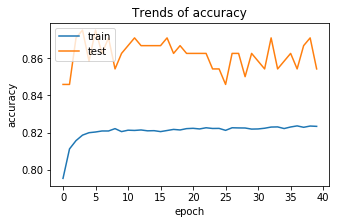



ACC:  0.8175
AUC:  0.7523394970615593
Log Loss:  0.4438779634932677


Confusion Matrix: 
[[4452  186]
 [ 909  453]]


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      4638
         1.0       0.71      0.33      0.45      1362

   micro avg       0.82      0.82      0.82      6000
   macro avg       0.77      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000



In [77]:
### train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop('default payment next month',axis=1), y, test_size = 0.2, random_state=4)

### split small data
payAMT_data_x_train = x_train.iloc[:, 0:6]
payAMT_data_x_test = x_test.iloc[:, 0:6]

payAMT_data_x_train = payAMT_data_x_train.values.reshape([len(payAMT_data_x_train), len(payAMT_data_x_train.columns), 1])
payAMT_data_x_test = payAMT_data_x_test.values.reshape([len(payAMT_data_x_test), len(payAMT_data_x_test.columns), 1])

BILL_data_x_train = x_train.iloc[:, 6:12]
BILL_data_x_test = x_test.iloc[:, 6:12]

BILL_data_x_train = BILL_data_x_train.values.reshape([len(BILL_data_x_train), len(BILL_data_x_train.columns), 1])
BILL_data_x_test = BILL_data_x_test.values.reshape([len(BILL_data_x_test), len(BILL_data_x_test.columns), 1])

PAY_data_x_train = x_train.iloc[:, 12:18]
PAY_data_x_test = x_test.iloc[:, 12:18]

PAY_data_x_train = PAY_data_x_train.values.reshape([len(PAY_data_x_train), len(PAY_data_x_train.columns), 1])
PAY_data_x_test = PAY_data_x_test.values.reshape([len(PAY_data_x_test), len(PAY_data_x_test.columns), 1])

demo_data_x_train = x_train.iloc[:, 18:]
demo_data_x_test = x_test.iloc[:, 18:]

demo_data_x_train = demo_data_x_train.values.reshape([len(demo_data_x_train), len(demo_data_x_train.columns), 1])
demo_data_x_test = demo_data_x_test.values.reshape([len(demo_data_x_test), len(demo_data_x_test.columns), 1])


### model run
input1 = Input(shape=(6,1))
#pay = GRU(20, return_sequences=True)(input1)
pay = GRU(20)(input1)
#pay = Dense(20, activation='tanh')(pay)
#pay = Dropout(0.2)(pay)
    
#input2 = Input(shape=(6,1))
#bill = GRU(20, return_sequences=True)(input2)
#bill = GRU(20)(input2)
#bill = Dense(20, activation='tanh')(bill)
#bill = Dropout(0.2)(bill)

#input3 = Input(shape=(6,1))
#pay_amt = GRU(20, return_sequences=True)(input3)
#pay_amt = GRU(20)(input3)
#pay_amt = Dense(20, activation='tanh')(pay_amt)
#pay_amt = Dropout(0.2)(pay_amt)

input4 = Input(shape=(5,1))
demo = GRU(20)(input4)
#demo = Dense(20, activation= 'tanh')(demo)
#demo = Dropout(0.2)(demo)


merge = concatenate([pay, demo])
    
hidden1 = Dense(20, activation='tanh')(merge)
    
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=[input1,input4], outputs=output)
    
model.summary()
    
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


BATCH_SIZE = 64

history = model.fit([PAY_data_x_train, demo_data_x_train],
                    y_train, batch_size = BATCH_SIZE, epochs=40, verbose=0, validation_split = 0.01)

# summarize history for accuracy in val
plt.figure(figsize=(5, 3))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Trends of accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
pred_proba = model.predict([PAY_data_x_test, demo_data_x_test])
pred = (pred_proba > 0.5).astype(int)
print('\n')
print('ACC: ',accuracy_score(y_test, pred))
print('AUC: ',roc_auc_score(y_test, pred_proba))
print('Log Loss: ', log_loss(pd.get_dummies(y_test), pred_proba))
print('\n')
print('Confusion Matrix: ')
print(confusion_matrix(y_test, pred))
print('\n')
print('Classification Report: ')
print(classification_report(y_test, pred))


test_acc_2.append(accuracy_score(y_test, pred))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_128 (InputLayer)          (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_129 (InputLayer)          (None, 5, 1)         0                                            
__________________________________________________________________________________________________
gru_129 (GRU)                   (None, 20)           1320        input_128[0][0]                  
__________________________________________________________________________________________________
gru_130 (GRU)                   (None, 20)           1320        input_129[0][0]                  
__________________________________________________________________________________________________
concatenat

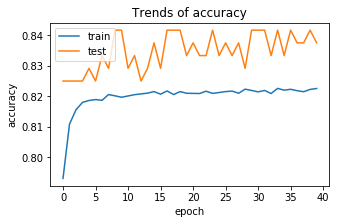



ACC:  0.8238333333333333
AUC:  0.7629256094979731
Log Loss:  0.4350648395170768


Confusion Matrix: 
[[4477  184]
 [ 873  466]]


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.89      4661
         1.0       0.72      0.35      0.47      1339

   micro avg       0.82      0.82      0.82      6000
   macro avg       0.78      0.65      0.68      6000
weighted avg       0.81      0.82      0.80      6000



In [78]:
### train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop('default payment next month',axis=1), y, test_size = 0.2, random_state=5)

### split small data
payAMT_data_x_train = x_train.iloc[:, 0:6]
payAMT_data_x_test = x_test.iloc[:, 0:6]

payAMT_data_x_train = payAMT_data_x_train.values.reshape([len(payAMT_data_x_train), len(payAMT_data_x_train.columns), 1])
payAMT_data_x_test = payAMT_data_x_test.values.reshape([len(payAMT_data_x_test), len(payAMT_data_x_test.columns), 1])

BILL_data_x_train = x_train.iloc[:, 6:12]
BILL_data_x_test = x_test.iloc[:, 6:12]

BILL_data_x_train = BILL_data_x_train.values.reshape([len(BILL_data_x_train), len(BILL_data_x_train.columns), 1])
BILL_data_x_test = BILL_data_x_test.values.reshape([len(BILL_data_x_test), len(BILL_data_x_test.columns), 1])

PAY_data_x_train = x_train.iloc[:, 12:18]
PAY_data_x_test = x_test.iloc[:, 12:18]

PAY_data_x_train = PAY_data_x_train.values.reshape([len(PAY_data_x_train), len(PAY_data_x_train.columns), 1])
PAY_data_x_test = PAY_data_x_test.values.reshape([len(PAY_data_x_test), len(PAY_data_x_test.columns), 1])

demo_data_x_train = x_train.iloc[:, 18:]
demo_data_x_test = x_test.iloc[:, 18:]

demo_data_x_train = demo_data_x_train.values.reshape([len(demo_data_x_train), len(demo_data_x_train.columns), 1])
demo_data_x_test = demo_data_x_test.values.reshape([len(demo_data_x_test), len(demo_data_x_test.columns), 1])


### model run
input1 = Input(shape=(6,1))
#pay = GRU(20, return_sequences=True)(input1)
pay = GRU(20)(input1)
#pay = Dense(20, activation='tanh')(pay)
#pay = Dropout(0.2)(pay)
    
#input2 = Input(shape=(6,1))
#bill = GRU(20, return_sequences=True)(input2)
#bill = GRU(20)(input2)
#bill = Dense(20, activation='tanh')(bill)
#bill = Dropout(0.2)(bill)

#input3 = Input(shape=(6,1))
#pay_amt = GRU(20, return_sequences=True)(input3)
#pay_amt = GRU(20)(input3)
#pay_amt = Dense(20, activation='tanh')(pay_amt)
#pay_amt = Dropout(0.2)(pay_amt)

input4 = Input(shape=(5,1))
demo = GRU(20)(input4)
#demo = Dense(20, activation= 'tanh')(demo)
#demo = Dropout(0.2)(demo)


merge = concatenate([pay, demo])
    
hidden1 = Dense(20, activation='tanh')(merge)
    
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=[input1,input4], outputs=output)
    
model.summary()
    
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


BATCH_SIZE = 64

history = model.fit([PAY_data_x_train, demo_data_x_train],
                    y_train, batch_size = BATCH_SIZE, epochs=40, verbose=0, validation_split = 0.01)

# summarize history for accuracy in val
plt.figure(figsize=(5, 3))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Trends of accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
pred_proba = model.predict([PAY_data_x_test, demo_data_x_test])
pred = (pred_proba > 0.5).astype(int)
print('\n')
print('ACC: ',accuracy_score(y_test, pred))
print('AUC: ',roc_auc_score(y_test, pred_proba))
print('Log Loss: ', log_loss(pd.get_dummies(y_test), pred_proba))
print('\n')
print('Confusion Matrix: ')
print(confusion_matrix(y_test, pred))
print('\n')
print('Classification Report: ')
print(classification_report(y_test, pred))


test_acc_2.append(accuracy_score(y_test, pred))

In [79]:
test_acc_2

[0.8195, 0.8201666666666667, 0.8326666666666667, 0.8175, 0.8238333333333333]

In [80]:
print(np.mean(test_acc_2))
print(np.std(test_acc_2))

0.8227333333333332
0.005372357231441534
